# MNIST Dataset

MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

# Data Description

The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.
Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

# Imports

In [1]:
import numpy as np #linear algebra
import matplotlib.pyplot as plt
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import scipy.io
import warnings
warnings.filterwarnings('ignore')
Test = pd.read_csv("/Users/neetakshi/Desktop/MachineLearning/test.csv").values
Train = pd.read_csv("/Users/neetakshi/Desktop/MachineLearning/train.csv").values

In [2]:
Train.shape

(42000, 785)

In [3]:
Test.shape

(28000, 784)

In [4]:
X = (Train[:,1:])
Y = (Train[:,0])

# Dimensionality Reduction using PCA

This graph will help us in choosing the no of components for training our data.

(784,)
(42000, 412)


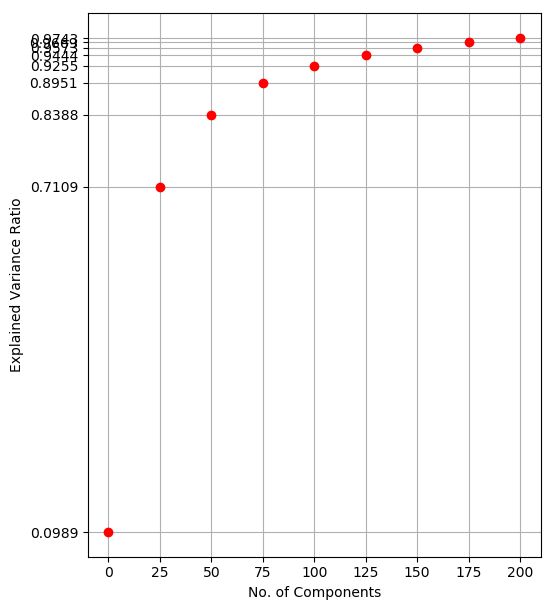

In [5]:
from sklearn.decomposition import PCA
# ## Removing the column with variance 0
variance = np.var(X, axis = 0)>1000
print(variance.shape)
X = X[:, variance]
Test = Test[:,variance]
print(X.shape)
# ##Calculate Principal Components
pca = PCA()
pca.fit(X)
explained_variance = pca.explained_variance_ratio_
# ##Calculate cumulative explained ration
cum_explained_variance = [np.sum(explained_variance[:i+1]) for i in range (0, 201, 25)]
X_axis = [i for i in range(0, 201,25)]

##Plot Graph
fig = plt.figure(figsize = (5.841, 7.195), dpi=100)
plt.plot(X_axis, cum_explained_variance, 'ro')
plt.grid(True, which = 'both')
plt.yticks(cum_explained_variance)
plt.xticks(X_axis)
plt.ylabel("Explained Variance Ratio")
plt.xlabel("No. of Components")
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size  = 0.20, random_state  = 0)

Define normalize function for normalizing the data, PrincipalComponents function to return top and principal components.

In [7]:
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler

def normalize(sigma2, mean2, X):
    X = (X-mean2)/sigma2
    return X

def PolynomialFeatures1(X):
    X_2 = np.square(X)
    X = np.column_stack((X, X_2))
    return X

J1 = []
J2 = []

##Take n principal components
def PrincipalComponents(n):
    pca = PCA(n_components= n)
    X_train1 = pca.fit_transform(X_train)
    X_test1 = pca.transform(X_test)
    return X_train1, X_test1

## Logistic Regression

def LogisticRegression(X_train2, y_train2, X_test2, y_test2, penalty):
    print("penalty= ", penalty)
    regr = linear_model.LogisticRegression(solver='lbfgs',max_iter=1000, C=penalty)
    regr.fit(X_train2, y_train2)
    score1 = regr.score(X_train2, y_train2)
    score2 = regr.score(X_test2, y_test2)
    print(score1, score2)
    Prediction = regr.predict(X_test2)
    return score1, score2, Prediction

we will first train data by taking the top n principal components which can explaine the variance of 0.8

penalty=  0.1
0.891455427229 0.895357142857
penalty=  0.1
0.893214269104 0.895595238095
penalty=  0.1
0.893308986566 0.895238095238
penalty=  0.1
0.892575813232 0.895595238095
penalty=  0.1
0.892657974693 0.895833333333
penalty=  0.1
0.892367550271 0.895
penalty=  0.1
0.892693355402 0.895952380952
penalty=  0.1
0.892069112488 0.895119047619
penalty=  0.1
0.892378363176 0.895476190476
penalty=  0.1
0.892003223784 0.895714285714


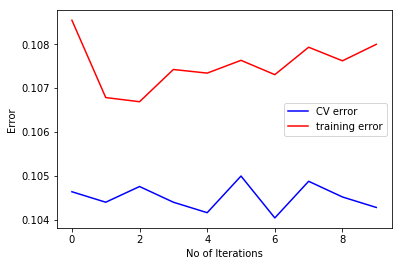

In [8]:
X_train1, X_test1 = PrincipalComponents(0.8)   # Getting principal components
J1 = []
J2 = []
for i in range(20000, X_train1.shape[0], 1500):
    score1, score2, Prediction = LogisticRegression(X_train1[:i+1,:], y_train[:i+1, ], 
                                                    X_test1[:i+1,:], y_test[:i+1], 0.1)
    J1.append(1-score1)
    J2.append(1-score2)
    
    
plt.plot(J2, 'b-', label = "CV error")
plt.plot(J1, 'r-', label ="training error")
plt.legend()
plt.ylabel("Error")
plt.xlabel("No of Iterations")
plt.show()

penalty=  0.1
0.910604469777 0.908571428571
penalty=  0.1
0.911538998186 0.908928571429
penalty=  0.1
0.911656014956 0.909047619048
penalty=  0.1
0.910860781193 0.907857142857
penalty=  0.1
0.910734202531 0.907261904762
penalty=  0.1
0.910475982692 0.908571428571
penalty=  0.1
0.91014102962 0.908214285714
penalty=  0.1
0.910494737877 0.90880952381
penalty=  0.1
0.910096559483 0.909285714286
penalty=  0.1
0.909763887645 0.908928571429


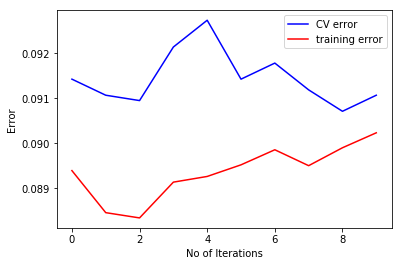

In [9]:
X_train1, X_test1 = PrincipalComponents(0.9)
J1 = []
J2 = []
for i in range(20000, X_train1.shape[0], 1500):
    score1, score2, Prediction = LogisticRegression(X_train1[:i+1,:],
                                                    y_train[:i+1, ], X_test1[:i+1,:], y_test[:i+1],0.1)
    J1.append(1-score1)
    J2.append(1-score2)
    
    
plt.plot(J2, 'b-', label = "CV error")
plt.plot(J1, 'r-', label ="training error")
plt.legend()
plt.ylabel("Error")
plt.xlabel("No of Iterations")
plt.show()

In [10]:
from sklearn.preprocessing import PolynomialFeatures
# poly = PolynomialFeatures(include_bias = False)

X1 = X.copy()
Test1 = Test.copy()

pca = PCA(n_components= 0.8388)
X1 = pca.fit_transform(X1)
Test1 = pca.transform(Test)

print(X1.shape, Test1.shape)

X1 = poly.fit_transform(X1)
Test1 = poly.fit_transform(Test1)

print(X1.shape, Test1.shape)

sigma = np.std(X1, axis = 0)
mean = np.mean(X1, axis = 0)

X1 = normalize(sigma, mean, X1)
Test1 = normalize(sigma , mean, Test1)
print(X1.shape, Test1.shape)


regr = linear_model.LogisticRegression(solver='lbfgs',max_iter=1000, C=0.1)
regr.fit(X1, Y)
score1 = regr.score(int(X1), int(Y))
print(score1)
Prediction = regr.predict(Test1)
image_id = np.arange(1,Prediction.shape[0]+1)
pd.DataFrame({"ImageId": image_id, "Label": Prediction}).to_csv('out_reg1.csv', 
                                                                      index=False, header=True)

(42000, 51) (28000, 51)


NameError: name 'poly' is not defined

# SVM

(8400, 43) (33600, 43)
0.9998800048 0.977976190476
0.99992453115 0.978452380952
0.99992857398 0.978095238095
0.999796617064 0.979404761905
0.999774200832 0.979166666667
0.999784622012 0.980119047619


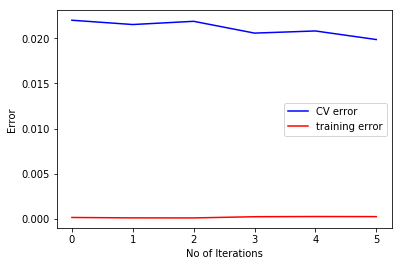

In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC

def supportVM(X_train2, y_train2, X_test2, y_test2, penalty):
    regr = SVC(kernel ='rbf', C=penalty)
    regr.fit(X_train2, y_train2)
    score1 = regr.score(X_train2, y_train2)
    score2 = regr.score(X_test2, y_test2)
    print(score1, score2)
    Prediction = regr.predict(X_test2)
    return score1, score2, Prediction

X_train1, X_test1 = PrincipalComponents(0.81)
print(X_test1.shape, X_train1.shape)

sigma = np.std(X_train1, axis = 0)
mean = np.mean(X_train1, axis = 0)

X_train1 = normalize(sigma , mean , X_train1)
X_test1 = normalize(sigma , mean, X_test1)

J1 = []
J2 = []
for i in range(25000, X_train1.shape[0], 1500):
    score1, score2, Prediction = supportVM(X_train1[:i+1,:], 
                                                    y_train[:i+1, ], X_test1[:i+1,:], y_test[:i+1],10)
    J1.append(1-score1)
    J2.append(1-score2)
    
plt.plot(J2, 'b-', label = "CV error")
plt.plot(J1, 'r-', label ="training error")
plt.legend()
plt.ylabel("Error")
plt.xlabel("No of Iterations")
plt.show()

Saving prediction trained with SVM

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
# poly = PolynomialFeatures(include_bias = False)

X1 = X.copy()
Test1 = Test.copy()

pca = PCA(n_components= 0.8388)
X1 = pca.fit_transform(X1)
Test1 = pca.transform(Test)

print(X1.shape, Test1.shape)

print(X1.shape, Test1.shape)

sigma = np.std(X1, axis = 0)
mean = np.mean(X1, axis = 0)

X1 = normalize(sigma, mean, X1)
Test1 = normalize(sigma , mean, Test1)
print(X1.shape, Test1.shape)


regr = SVC(kernel ='rbf', C=10)
regr.fit(X1, Y)
score1 = regr.score(X1, Y)
print(score1)
Prediction = regr.predict(Test1)
Prediction = regr.predict(Test1)
image_id = np.arange(1,Prediction.shape[0]+1)
pd.DataFrame({"ImageId": image_id, "Label": Prediction}).to_csv("/Users/neetakshi/Desktop/MachineLearning/out_svm.csv", 
                                                                      index=False, header=True)

(42000, 51) (28000, 51)
(42000, 51) (28000, 51)
(42000, 51) (28000, 51)
